In [ ]:
# 🧰 1. Install required packages (once only)

# pip install ONE-api brainbox ibllib

In [12]:
import numpy as np

In [20]:
# Loading a single session’s trials

from one.api import ONE
one = ONE()
eid = '4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a'
trials = one.load_object(eid, 'trials', collection='alf')

In [22]:
from brainbox.io.one import SessionLoader
from one.api import ONE
one = ONE()
eid = '4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a'
sl = SessionLoader(eid=eid, one=one)
sl.load_trials()

# The datasets are attributes of the sl.trials, for example probabilityLeft:
probabilityLeft = sl.trials['probabilityLeft']
# Find all of them using:
sl.trials.keys()

Index(['goCueTrigger_times', 'stimOff_times', 'probabilityLeft',
       'feedbackType', 'response_times', 'choice', 'firstMovement_times',
       'contrastLeft', 'contrastRight', 'stimOn_times', 'rewardVolume',
       'feedback_times', 'goCue_times', 'intervals_0', 'intervals_1'],
      dtype='object')

# Exploring trials data

In [23]:
#  Example 1. Computing behavioral performance
from brainbox.behavior.training import compute_performance

# compute performance
performance, contrasts, n_contrasts = compute_performance(trials)

# compute performance expressed as probability of choosing right
# performance, contrasts, n_contrasts = compute_performance(trials, prob_right=True)

# compute performance during 0.8 biased block
# performance, contrasts, n_contrasts = compute_performance(trials, block=0.8)

# print important performance stats
print(f'Performance: {np.round(performance,2)}')
print(f'Contrasts: {contrasts}')
print(f'Number of Contrasts: {n_contrasts}')

Performance: [1.   0.97 0.9  0.77 0.71 0.56 0.82 0.88 0.93]
Contrasts: [-100.    -25.    -12.5    -6.25    0.      6.25   12.5    25.    100.  ]
Number of Contrasts: [60 61 61 57 59 59 66 49 57]


In [24]:
# Example 2. Filtering trials
from brainbox.task.trials import find_trial_ids

# find index for stim right trials ordered by trial number
trial_id, _ = find_trial_ids(trials, side='right', choice='all', order='trial num')

# find index for correct, stim left, 100% contrast trials ordered by reaction time
# trial_id, _ = find_trial_ids(trials, side='left', choice='correct', contrast=[1], order='reaction time')

# find index for correct trials ordered by trial number sorted by stimulus side
# trial_id, _ = find_trial_ids(trials, side='left', choice='correct', order='reaction time', sort='side')


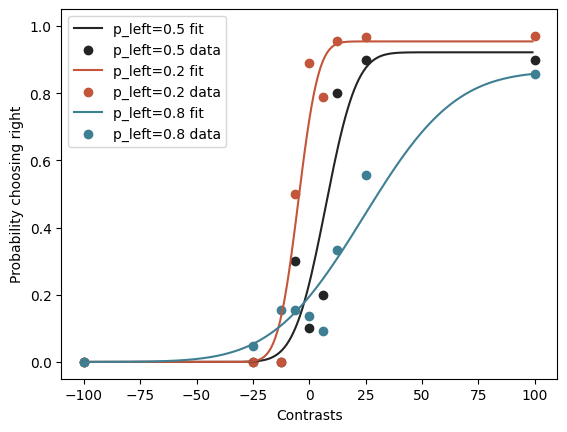

In [25]:
# Example 3. Plotting psychometric curve
from brainbox.behavior.training import plot_psychometric

fig, ax = plot_psychometric(trials)

In [26]:
# Example 4: Computing Task QC for session

# outcome gives you a summary pass/fail status (like CRITICAL, WARNING, or PASS)
# results is a dictionary with individual QC metrics, like cue timing consistency or response latency issues

from ibllib.qc import task_metrics

qc = task_metrics.TaskQC(eid)
outcome, results = qc.run()
print(f'QC_status: {outcome}')
print(f'Individual QC values:')
results

AssertionError: 

In [27]:
# Example 5: Computing the inter-trial interval (ITI)
from brainbox.io.one import load_iti
eid = 'ae8787b1-4229-4d56-b0c2-566b61a25b77'
trials = one.load_object(eid, 'trials')
trials['iti'] = load_iti(trials)
print(trials.to_df().iloc[:5, -5:])

(S3) /Users/xueshutian/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0027/2022-08-23/001/alf/_ibl_trials.table.pqt: 100%|██████████| 68.7k/68.7k [00:00<00:00, 214kB/s]
(S3) /Users/xueshutian/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0027/2022-08-23/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 7.21k/7.21k [00:00<00:00, 61.6kB/s]
(S3) /Users/xueshutian/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0027/2022-08-23/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 7.21k/7.21k [00:00<00:00, 74.8kB/s]

   rewardVolume  firstMovement_times  intervals_0  intervals_1       iti
0           1.5           117.641626   116.695529   119.305634  1.191781
1           1.5           127.492626   119.997332   129.171944  1.223111
2           1.5           131.802626   129.895043   133.568441  1.202380
3           0.0           136.639626   134.270738   139.385252  1.255541
4           1.5           141.399626   140.140751   143.068359  1.167783


# Loading spikeSorting data


In [30]:
from one.api import ONE
from brainbox.io.one import SpikeSortingLoader
one = ONE(base_url='https://openalyx.internationalbrainlab.org')

In [32]:
# Takes > 3 min
pid = 'da8dfec1-d265-44e8-84ce-6ae9c109b8bd'
ssl = SpikeSortingLoader(pid=pid, one=one)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)
# waveforms = ssl.load_spike_sorting_object('waveforms')  # loads in the template waveforms

TypeError: unsupported operand type(s) for |: 'AlfBunch' and 'AlfBunch'

# Exploring spikesorting data

In [ ]:
# Example 1: Loading different spikesorting versions

# By default, if available, the data spikesorted with pykilosort is loaded.
# To find the spikesorting version that is loaded we can use
sl.collection

# To see all available spikesorted data for this probe insertion we can list the collections.
# N.B. ks2.5 matlab spikesorted data is stored in the alf/probe00 folder
sl.collections

# The following can be used to load a specific version of spikesorting

# pykilosort version
spikes, clusters, channels = sl.load_spike_sorting(spike_sorter='pykilosort')

# ks2.5 matlab version
spikes, clusters, channels = sl.load_spike_sorting(spike_sorter='')


In [ ]:
# Example 2: Loading additional data (e.g., clusters)

# The default spikes and cluster attributes loaded are:
# spikes - amps, clusters, depths, times
# cluster - channels, depths, metrics

#Other attributes can additionally be loaded in the following way
spikes, clusters, channels = sl.load_spike_sorting(dataset_types=['clusters.amps', 'spikes.samples'])
clusters = sl.merge_clusters(spikes, clusters, channels)


In [ ]:
# Example 3: Compute firing rate across session
from brainbox.ephys_plots import image_fr_plot
from iblutil.numerical import bincount2D
import numpy as np

time_bin = 0.05 # time bin in seconds
depth_bin = 10 # depth bin in um

# Remove any nan values
kp_idx = np.bitwise_and(~np.isnan(spikes['times']), ~np.isnan(spikes['depths']))

fr, time, depth = bincount2D(spikes['times'][kp_idx], spikes['depths'][kp_idx], time_bin, depth_bin)


In [ ]:
# Example 4: Find clusters labelled as good
good_clusterIDs = clusters['cluster_id'][clusters['label'] == 1]


In [ ]:
# Example 5: Plot a raster for all units
sl.raster(spikes, channels)
